In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
style.use("ggplot")

In [3]:
df = pd.read_csv("TSLA.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
X = df[["High","Open","Low","Volume"]]
Y = df["Close"]

In [6]:
X.head()

,High,Open,Low,Volume
0,25.00,19.000000,17.540001,18766300
1,30.42,25.790001,23.299999,17187100
2,25.92,25.000000,20.270000,8218800
3,23.10,23.000000,18.709999,5139800
4,20.00,20.000000,15.830000,6866900


In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2014)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
Y_pred = regressor.predict(X_test)
result = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})

In [11]:
result.head()

,Actual,Predicted
1796,362.910004,365.244488
1001,229.589996,228.884488
632,35.360001,35.087120
1174,203.339996,204.971999
2376,330.369995,329.584136


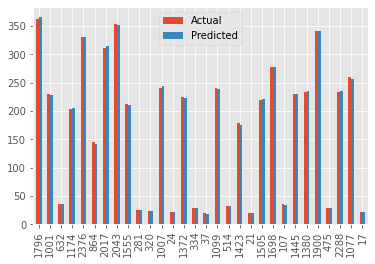

In [12]:
import math
graph = result.head(30)
graph.plot(kind="bar")

In [13]:
#No of trading days
df.shape

(2416, 7)

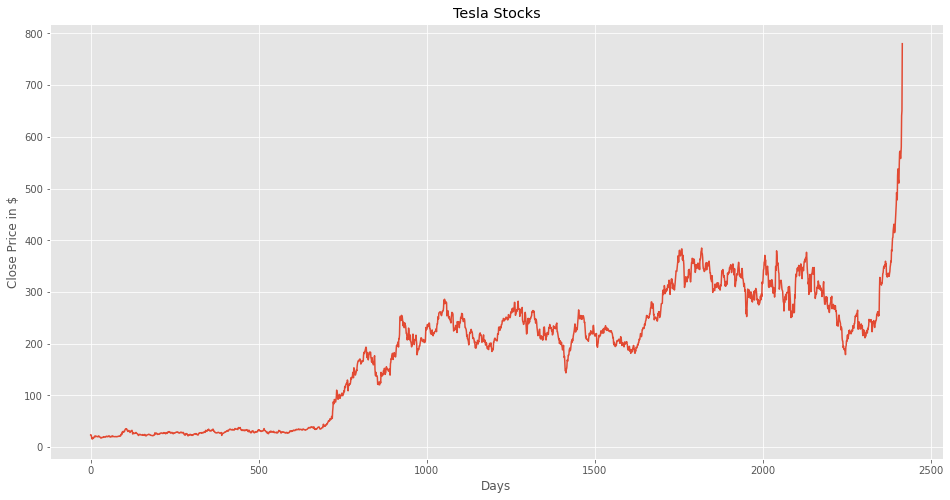

In [16]:
#Visualize the Close Price
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Tesla Stocks")
plt.xlabel("Days")
plt.ylabel("Close Price in $")
plt.plot(df['Close'])
plt.show()

In [20]:
future_days = 25
df = df[["Close"]]
df["Prediction"] = df[["Close"]].shift(-future_days)
df.tail()

,Close,Prediction
2411,566.900024,NaN
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [21]:
X = np.array(df.drop(["Prediction"],1))[:-future_days]

In [22]:
X

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [419.220001],
       [425.25    ],
       [430.940002]])

In [23]:
Y = np.array(df["Prediction"])[:-future_days]

In [24]:
Y

array([ 21.26    ,  20.450001,  19.59    , ..., 640.809998, 650.570007,
       780.      ])

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
X_future = df.drop(["Prediction"],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)

In [27]:
X_future

array([[352.220001],
       [354.829987],
       [333.040009],
       [336.339996],
       [328.920013],
       [331.290009],
       [329.940002],
       [334.869995],
       [336.200012],
       [333.029999],
       [330.369995],
       [335.890015],
       [339.529999],
       [348.839996],
       [352.700012],
       [359.679993],
       [358.390015],
       [381.5     ],
       [378.98999 ],
       [393.149994],
       [404.040009],
       [405.589996],
       [419.220001],
       [425.25    ],
       [430.940002]])

In [28]:
lr = LinearRegression().fit(X_train,Y_train)
lr_pred = lr.predict(X_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


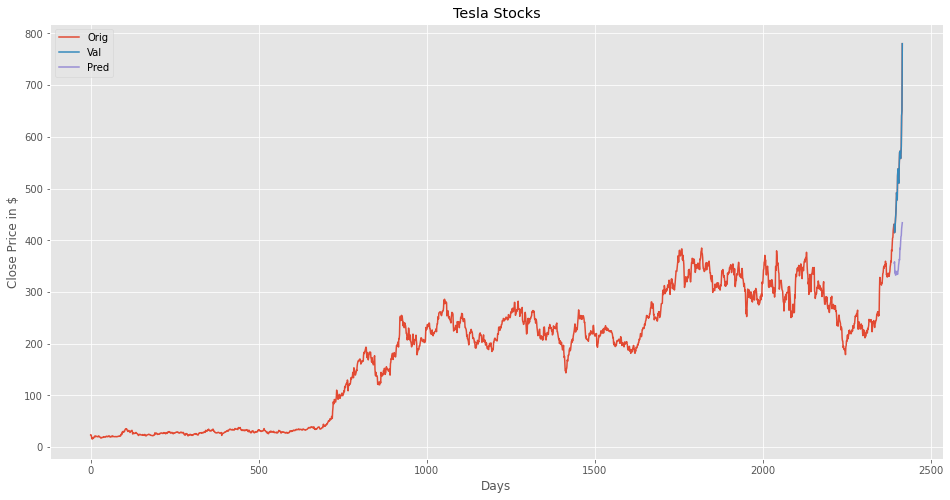

In [29]:
valid = df[X.shape[0]:]
valid["Prediction"] = lr_pred
plt.figure(figsize=(16,8))
plt.title("Tesla Stocks")
plt.xlabel("Days")
plt.ylabel("Close Price in $")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(["Orig","Val","Pred"])
plt.show()